In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch_smodel import *

# 1. Cargamos los datos de input y el target

In [2]:
df_input = pd.read_csv('df_input.csv', index_col=0)
grid_incendio = np.load('grid_incendio.npy')

In [3]:
df_input

,Theta,Rho,Temperature,Humidity
14:00:00,5.829400,0.425,35.0,28
14:30:00,5.497787,0.500,35.0,28
15:00:00,5.497787,0.625,35.5,28
15:30:00,5.619960,0.550,35.0,26
16:00:00,5.497787,0.500,35.0,25
16:30:00,5.654867,0.500,35.5,25
17:00:00,5.497787,0.500,36.0,24
17:30:00,5.497787,0.425,36.7,24
18:00:00,5.829400,0.375,36.0,25
18:30:00,2.129302,0.250,35.0,35


In [4]:
last_layer = torch.Tensor(grid_incendio[:, :, -1]) 
target_s = (last_layer==0)*1.
target_d = (last_layer==2)*1.
target_i = (grid_incendio==1)*1.

In [5]:
target_i = torch.Tensor(target_i)

# 2. Creamos nuestro GRID AI

In [6]:
grid = AI_Grid(N=31, K=17)
grid.__param__(inc=1, partition=[0.1, 0.5, 0.9])
grid.load_data(data=df_input)
grid.AI_MonteCarlo(input_size=2, target_s=target_i, n_it=100, epochs=10)

Number epoch:  0
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Epoch 0/10 Loss 0.31467 Tau 1.0 Learn Rate 0.5
Number epoch:  1
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Number epoch:  2
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Epoch 2/10 Loss 0.12252 Tau 0.94 Learn Rate 0.42
Number epoch:  3
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Number epoch:  4
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Epoch 4/10 Loss 0.08408 Tau 0.88 Learn Rate 0.33999999999999997
Number epoch:  5
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Number epoch:  6
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Epoch 6/10 Loss 0.06761 Tau 0.8200000000000001 Learn Rate 0.25999999999999995
Number epoch:  7
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Number epoch:  8
FLAGGGGGGG!!!
FLAGGGGGGG!!!
Epoch 8/10 Loss 0.05846 Tau 0.76 Learn Rate 0.18
Number epoch:  9
FLAGGGGGGG!!!
FLAGGGGGGG!!!


In [13]:
grid.div, grid.m

(tensor([ 8721.7041,  8721.7041,  8798.3320,  8482.7031,  8363.2021,  8439.8301,
          8396.9570,  8504.2373,  8516.4570,  9558.2471, 10293.6123, 10345.6504,
         10039.1553,  9962.5312, 10005.4199,  9928.7959,  9971.6826],
        dtype=torch.float64, grad_fn=<ToCopyBackward0>),
 tensor([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1], dtype=torch.int8))

<AxesSubplot:>

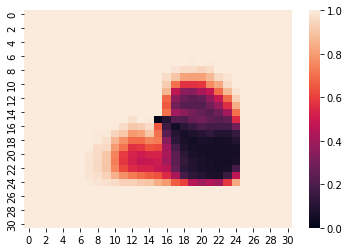

In [14]:
sns.heatmap(grid.X0[:, :, -1])

In [9]:
torch.sum(grid.P!=0)

tensor(330)

In [10]:
torch.autograd.set_detect_anomaly(True)

In [11]:
grid.p0, grid.div.grad_fn

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        dtype=torch.float64, grad_fn=<ToCopyBackward0>),
 <ToCopyBackward0 at 0x1ee9d5869b0>)

In [12]:
grid.S.flatten().reshape(31,31,18) == grid.S

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],